<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/marketing_campaigns_5th_3mtt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluating the Impact of Marketing Campaigns
In a fast paced world like we experience daily, every company seeks one means of the other to maintain profitability and gain quantifiable market share. For marketing companies they focus on consistently running successful campaigns in a complex and competitive market.

For this to be possible, they set up on A/B testing systems, a randomized experimentation method that involves presenting different versions of a variable (such as a web page, banner, or ad) to separate segments of the audience simultaneously. This approach helps determine which version has the most significant impact on business metrics.

To address these questions, the company conducted an A/B test, where the majority of participants were exposed to ads (the experimental group) and a smaller portion saw a Public Service Announcement (PSA) or nothing (the control group).

About the Dataset
Feature	Description
Row Index	Row index
User ID	Unique identifier for each user
Test Group	Indicates whether the user was in the "ad" group (saw the advertisement) or the "psa" group (saw the public service announcement or nothing)
Converted	Indicates whether the user bought the product (True) or not (False)
Total Ads	The number of ads seen by the user
Most Ads Day	The day when the user saw the highest number of ads
Most Ads Hour	The hour of the day when the user saw the highest number of ads
The marketing data can be found here.

Objective
The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

Analyze the experimental and control groups to determine if the ads were successful.

Estimate the potential revenue generated from the ads.

Assess the statistical significance of the differences between the groups using A/B testing techniques.

Colab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install gdown -q

In [ ]:
import gdown

# Google Drive file ID
file_id = '1YDS_6_1sCJPjucNX6Feo9uGa8B3w8Xzk'
output = 'marketing_AB.csv'

# Download the file using gdown
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)

# Load the data into a pandas DataFrame
df = pd.read_csv(output)

display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1YDS_6_1sCJPjucNX6Feo9uGa8B3w8Xzk
To: /content/marketing_AB.csv
100%|██████████| 22.6M/22.6M [00:00<00:00, 57.6MB/s]


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## **Analysis**

In [ ]:
# Conversion rates by test group
conversion_rates = df.groupby('test group')['converted'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


In [ ]:
# Counts for hypothesis testing
counts = df.groupby('test group')['converted'].agg(['sum', 'count'])
print("\nCounts:\n", counts)


Counts:
               sum   count
test group               
ad          14423  564577
psa           420   23524


In [ ]:
## Hypothesis Test (z-test for proportions)
# Null hypothesis: conversion rates are equal
ad_converted = counts.loc['ad', 'sum']
ad_total = counts.loc['ad', 'count']
psa_converted = counts.loc['psa', 'sum']
psa_total = counts.loc['psa', 'count']

In [ ]:
count_success = [ad_converted, psa_converted]
count_obs = [ad_total, psa_total]

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_value = proportions_ztest(count_success, count_obs)
print(f"\nZ-statistic: {z_stat}, p-value: {p_value}")


Z-statistic: 7.3700781265454145, p-value: 1.7052807161559727e-13


In [ ]:
# Interpretation
if p_value < 0.05:
    print("Reject null hypothesis: conversion rates are statistically significantly different.")
else:
    print("Fail to reject null hypothesis: no significant difference in conversion rates.")


Reject null hypothesis: conversion rates are statistically significantly different.


In [ ]:
## Additional Exploration
print("\nTotal Ads stats:\n", df['total ads'].describe())
print("\nConversion by day:\n", df.groupby('most ads day')['converted'].mean())


Total Ads stats:
 count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

Conversion by day:
 most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64


Conversion Rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


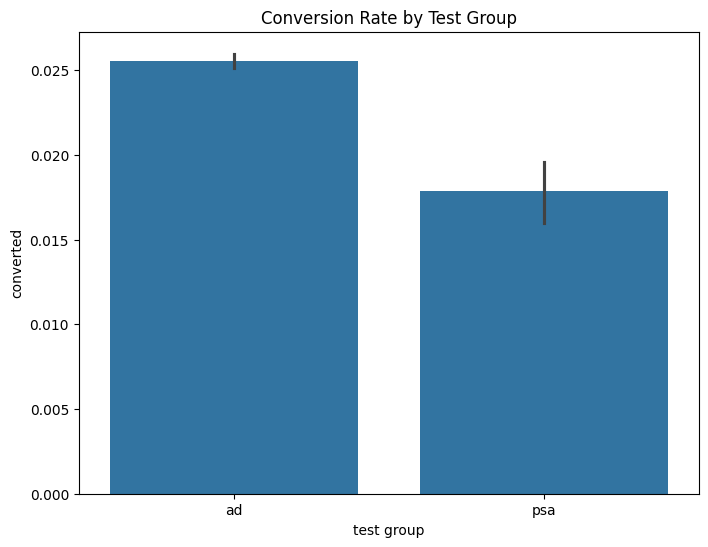

In [ ]:
## Visualizations and Analysis
# 1. Conversion Rate by Test Group
conversion_rates = df.groupby('test group')['converted'].mean()
print("Conversion Rates:\n", conversion_rates)
plt.figure(figsize=(8,6))
sns.barplot(x='test group', y='converted', data=df)
plt.title('Conversion Rate by Test Group')
plt.show()

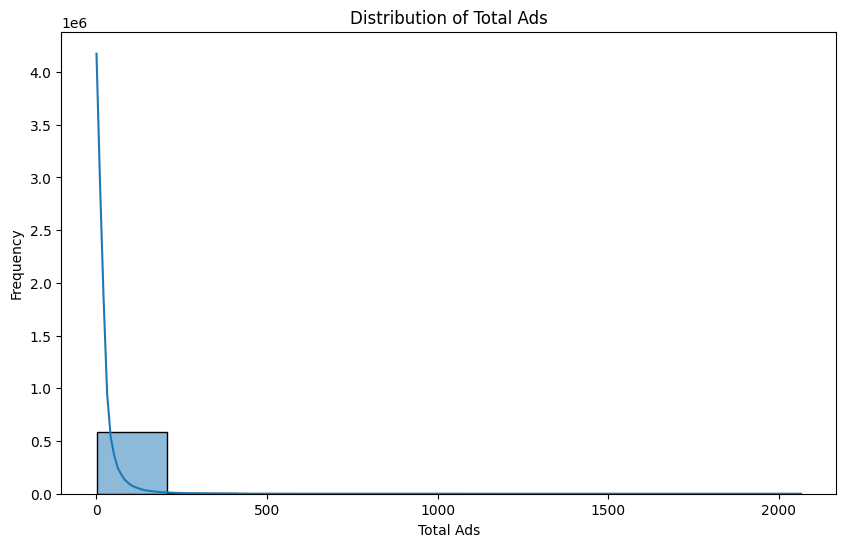

In [ ]:
# 2. Distribution of Total Ads
plt.figure(figsize=(10,6))
sns.histplot(df['total ads'], bins=10, kde=True)
plt.title('Distribution of Total Ads')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.show()

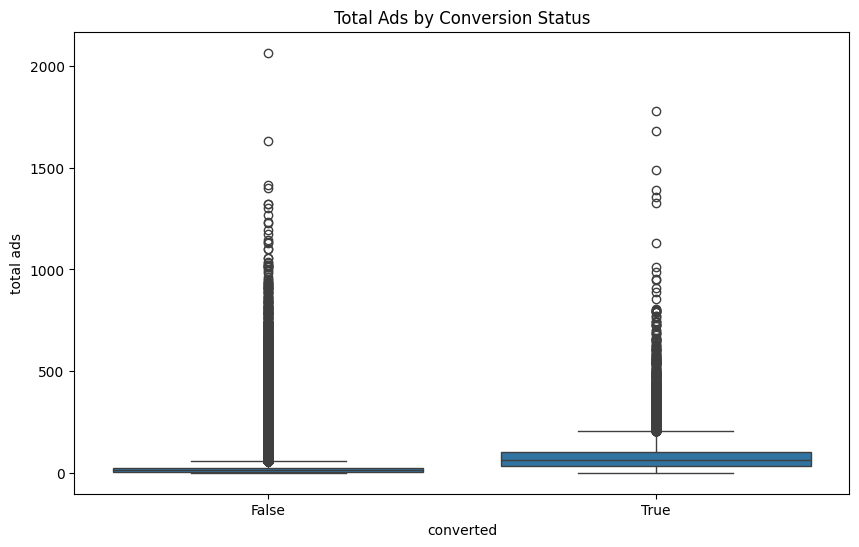

In [ ]:
# 3. Conversion vs. Total Ads
plt.figure(figsize=(10,6))
sns.boxplot(x='converted', y='total ads', data=df)
plt.title('Total Ads by Conversion Status')
plt.show()


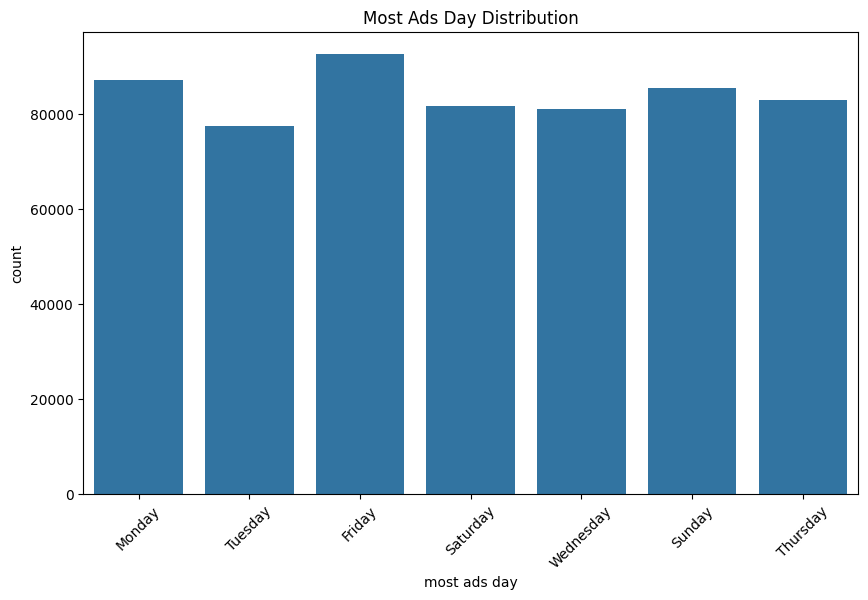

In [ ]:
# 4. Most Ads Day
plt.figure(figsize=(10,6))
sns.countplot(x='most ads day', data=df)
plt.title('Most Ads Day Distribution')
plt.xticks(rotation=45)
plt.show()

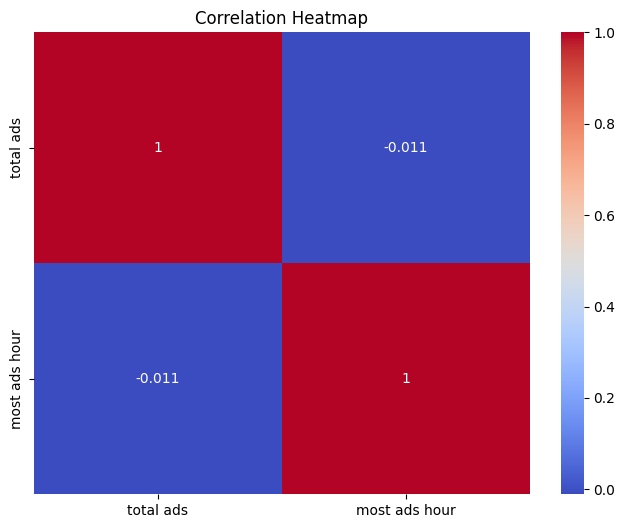

In [ ]:
# 5. Correlation Heatmap (for numeric columns)
numeric_df = df[['total ads', 'most ads hour']]
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()